In [2]:
import cv2
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle



In [3]:
train_df = pd.read_csv('real_train.csv')
ttest_df = pd.read_csv('real_test.csv')
train_df = shuffle(train_df)

In [4]:
def load_data(path, labels):
    X=[]
    Y =[]
    for x,y in zip(path, labels):
        img = cv2.imread(x)
        #print(img.shape)
        #break
        #img.reshape(w,h,-1)
        X.append(img)
        Y.append(y)
    X = np.array(X)
    Y = np.array(Y)
    return X,Y

In [5]:
X,Y = load_data(train_df['path'].tolist(),train_df['label'].tolist())

In [6]:
def load_samples(start,X):
    i =0
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    for x in X[start:start+9]:
        ax = list(axes.flatten())[i]
        ax.imshow(x)
        ax.set_title('Image '+str(i+1))
        ax.axis('off')
        i+=1
    plt.show()

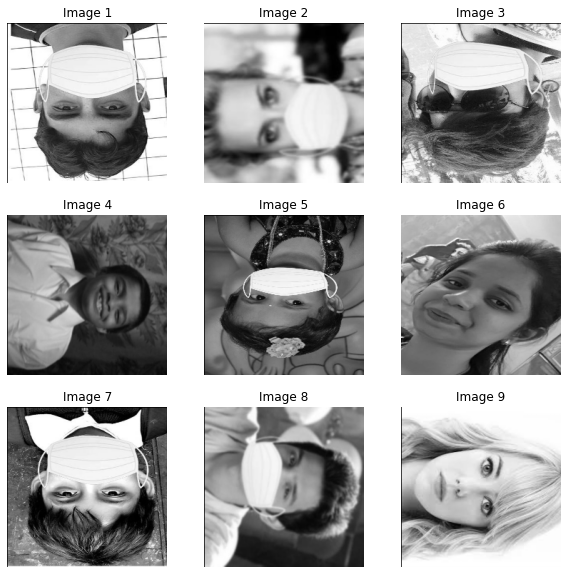

In [7]:
load_samples(13,X)

In [8]:
X= X/255

In [9]:
X[0].shape

(224, 224, 3)

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [13]:
tf.debugging.set_log_device_placement(True)


In [11]:
model = Sequential()
model.add(Conv2D(256, (3, 3), input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 256)     7168      
_________________________________________________________________
activation (Activation)      (None, 222, 222, 256)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 256)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 256)     590080    
_________________________________________________________________
activation_1 (Activation)    (None, 109, 109, 256)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 746496)            0

In [ ]:
model.fit(X, Y, batch_size=1, epochs=1,validation_split=0.3)# The model takes 49 minutes and 45 seconds to train.


In [15]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,pre.round())

NameError: name 'y_test' is not defined

In [53]:
cmm=np.array(cm)

In [57]:
dic= {
    'Mask': cmm[0],
    'No mask':cmm[1]
}

In [62]:
df_cm =pd.DataFrame(dic,index=['Mask','No mask'])

In [63]:
df_cm

,Mask,No mask
Mask,72,11
No mask,316,377
